# Stock Price Forcasting Using Tensorflow

In [89]:
import yfinance as yf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Miscellaneous Functions

In [90]:
def drop_columns(hist):
    return hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

def set_size(num, df):
    return df.shape[0]-num

In [74]:
## Collecting the data

In [91]:
data = yf.Ticker('MSFT')
df = drop_columns(data.history(start='2010-01-01'))
n = len(df)
df

,Close
Date,
2010-01-04,24.17
2010-01-05,24.18
2010-01-06,24.03
2010-01-07,23.78
2010-01-08,23.94
...,...
2020-09-18,200.39
2020-09-21,202.54
2020-09-22,207.42


In [92]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,2701.0,61.132421,47.820594,18.13,24.61,41.65,84.91,231.65


In [93]:
import datetime

date_time = pd.to_datetime(df.index, format='%d.%m.%Y')
timestamp_s = date_time.map(datetime.datetime.timestamp)
date_time

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24'],
              dtype='datetime64[ns]', name='Date', length=2701, freq=None)

In [94]:
column_indices = {name: i for i, name in enumerate(df.columns)}
column_indices

{'Close': 0}

## Splitting the data

In [95]:
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

## Normalizing the data using regularization

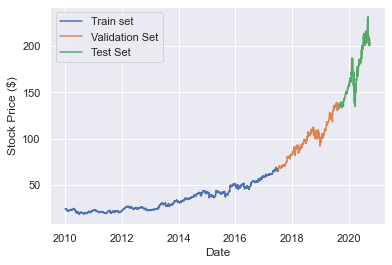

In [96]:
plt.plot(train_df['Close'])
plt.plot(val_df['Close'])
plt.plot(test_df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend(['Train set', 'Validation Set', 'Test Set'])
plt.show()

In [97]:
train_mean = train_df.mean()
train_std = train_df.std()

# train_df = (train_df - train_mean)/train_std
# val_df = (train_df - train_mean)/train_std
# test_df = (train_df - train_mean)/train_std

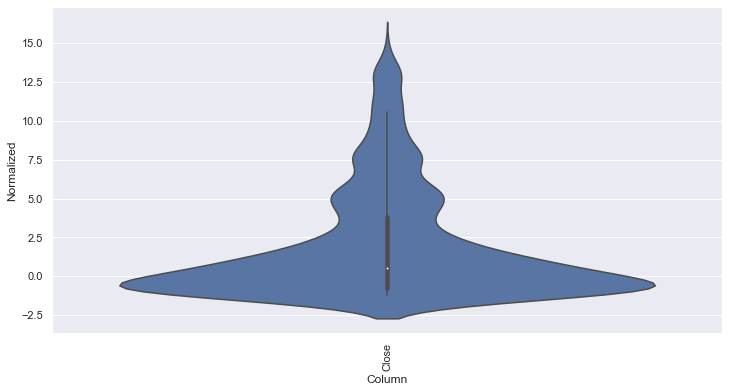

In [98]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## Getting some baseline readings

In [165]:
# train_df['Date'] = train_df.index
def create_numpy(df):
    df_x = df.index.to_numpy()
    df_y = df['Close'].to_numpy()
    return df_x, df_y

train_df.index = range(1, len(train_df)+1)
val_df.index = range(len(train_df)+1, len(train_df)+len(val_df)+1)
train_df_x, train_df_y = create_numpy(train_df)
val_df_x, val_df_y = create_numpy(val_df)
val_df_x.shape, val_df_y.shape, train_df_x.shape, train_df_y.shape

((540,), (540,), (1890,), (1890,))

In [158]:
import tensorflow as tf
import keras

# Naive predictions
y_pred = val_df['Close'][val_df.index[-1]]
np.mean(keras.losses.mean_squared_error(val_df_y, y_pred))

1550.4535116666666

In [172]:
train_df_x.shape

(1890,)

In [171]:
## Basic prediction schema
np.random.seed(42)
tf.random.set_seed(42)

model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(1890,1)),
    keras.layers.Dense(1)
])

model_1.compile(loss="mse", optimizer="adam")
history = model_1.fit(train_df_x, train_df_y, epochs=20, validation_data=(val_df_x, val_df_y))
history

Epoch 1/20


ValueError: in user code:

    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_19 is incompatible with the layer: expected axis -1 of input shape to have value 1890 but received input with shape [None, 1]


## Implementing Simple RNN

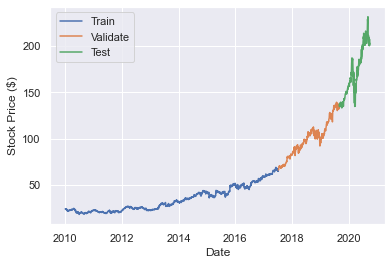

In [87]:
plt.plot(train_df['Close'])
plt.plot(val_df['Close'])
plt.plot(test_df['Close'])
plt.legend(['Train', 'Validate', 'Test'])
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.show()

In [84]:
## Simple one neuron RNN. Just to test the code
MAX_EPOCHS = 20

def compile_and_fit(model, df_train, df_val, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')
    model.compile(loss=tf.losses.MeanSquaredError(), 
                    optimizer=tf.optimizers.Adam(),
                    metrics=[tf.metrics.MeanAbsoluteError()])
    history = model.fit(df.index, df['Close'], epochs=MAX_EPOCHS, validation_data=df_val['Close'], callbacks=                                          [early_stopping])
    return history

model_simpleRNN = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

# history = compile_and_fit(model_simpleRNN, train_df, val_df)